# K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('C:/Users/Dell/Downloads/Live_20210128.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
# Dropping the columns that are redundant
data.drop(columns = ['Column1','Column2','Column3','Column4'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [6]:
len(data['status_id'].unique()) 

7050

In [7]:
len(data['status_published'].unique())

6913

In [8]:
# Since almost all values the status_id and status_published columns are unique we will drop them
data.drop(columns = ['status_id','status_published'], axis = 1, inplace = True)
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [9]:
data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [10]:
# Converting status_type to numerical
data = pd.get_dummies(data, columns = ['status_type'])
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


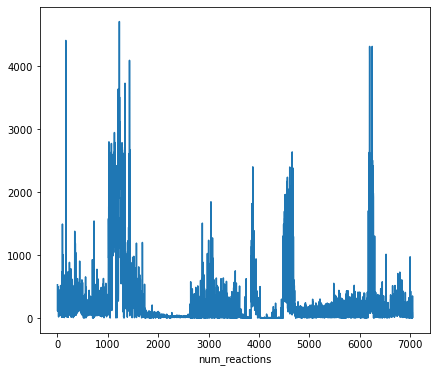

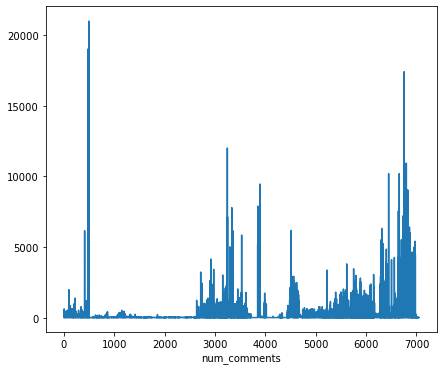

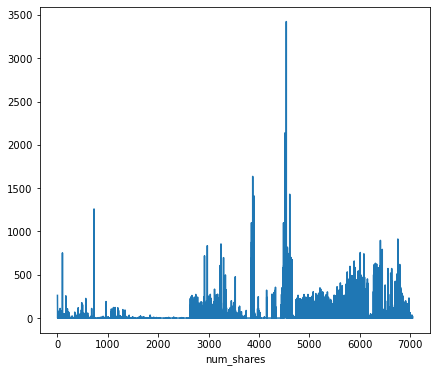

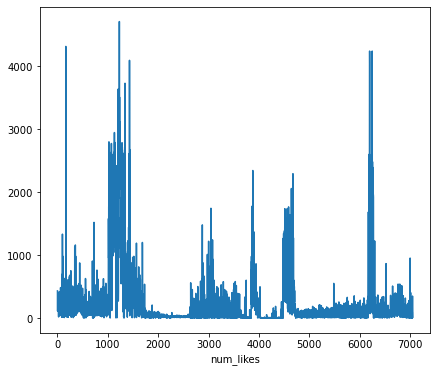

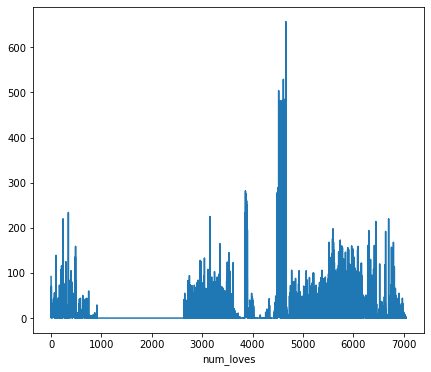

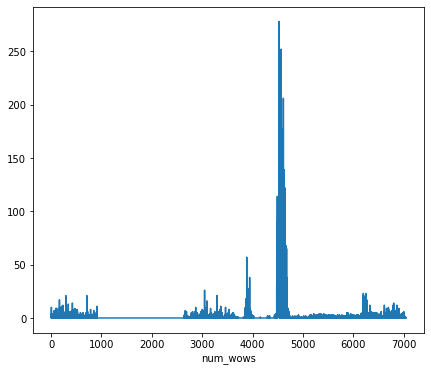

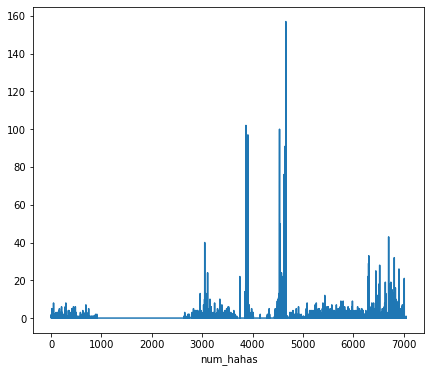

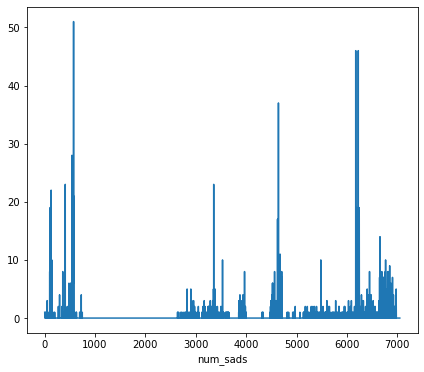

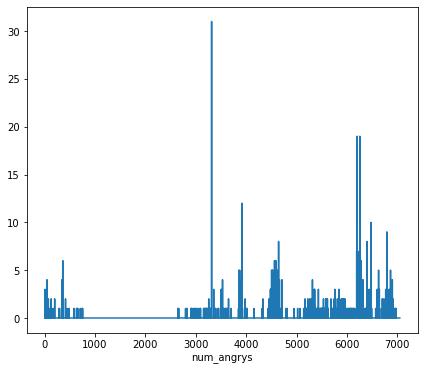

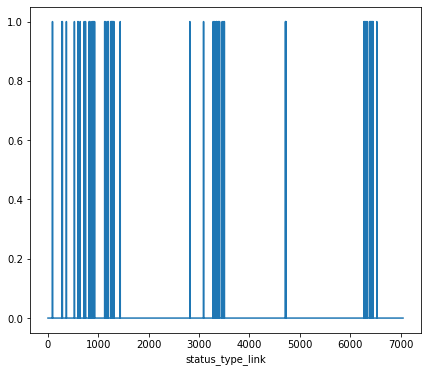

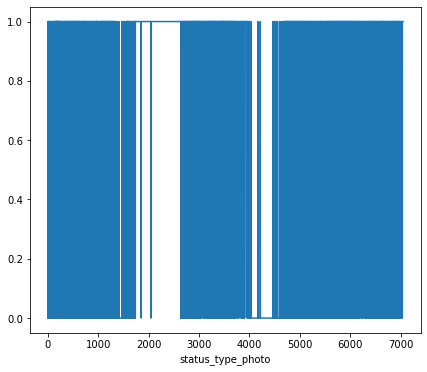

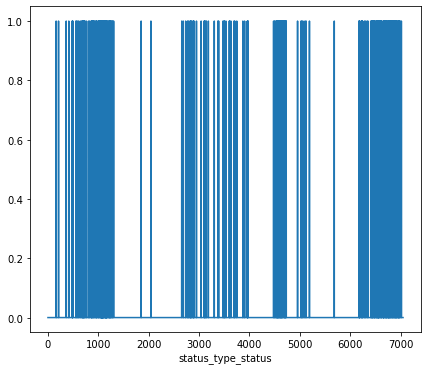

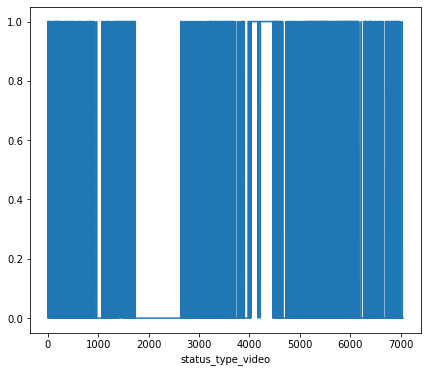

In [11]:
# Basic EDA
col = data.columns

for i in col:
    plt.figure(figsize = (7,6))
    plt.plot(data[i])
    plt.xlabel(i)
    plt.show()

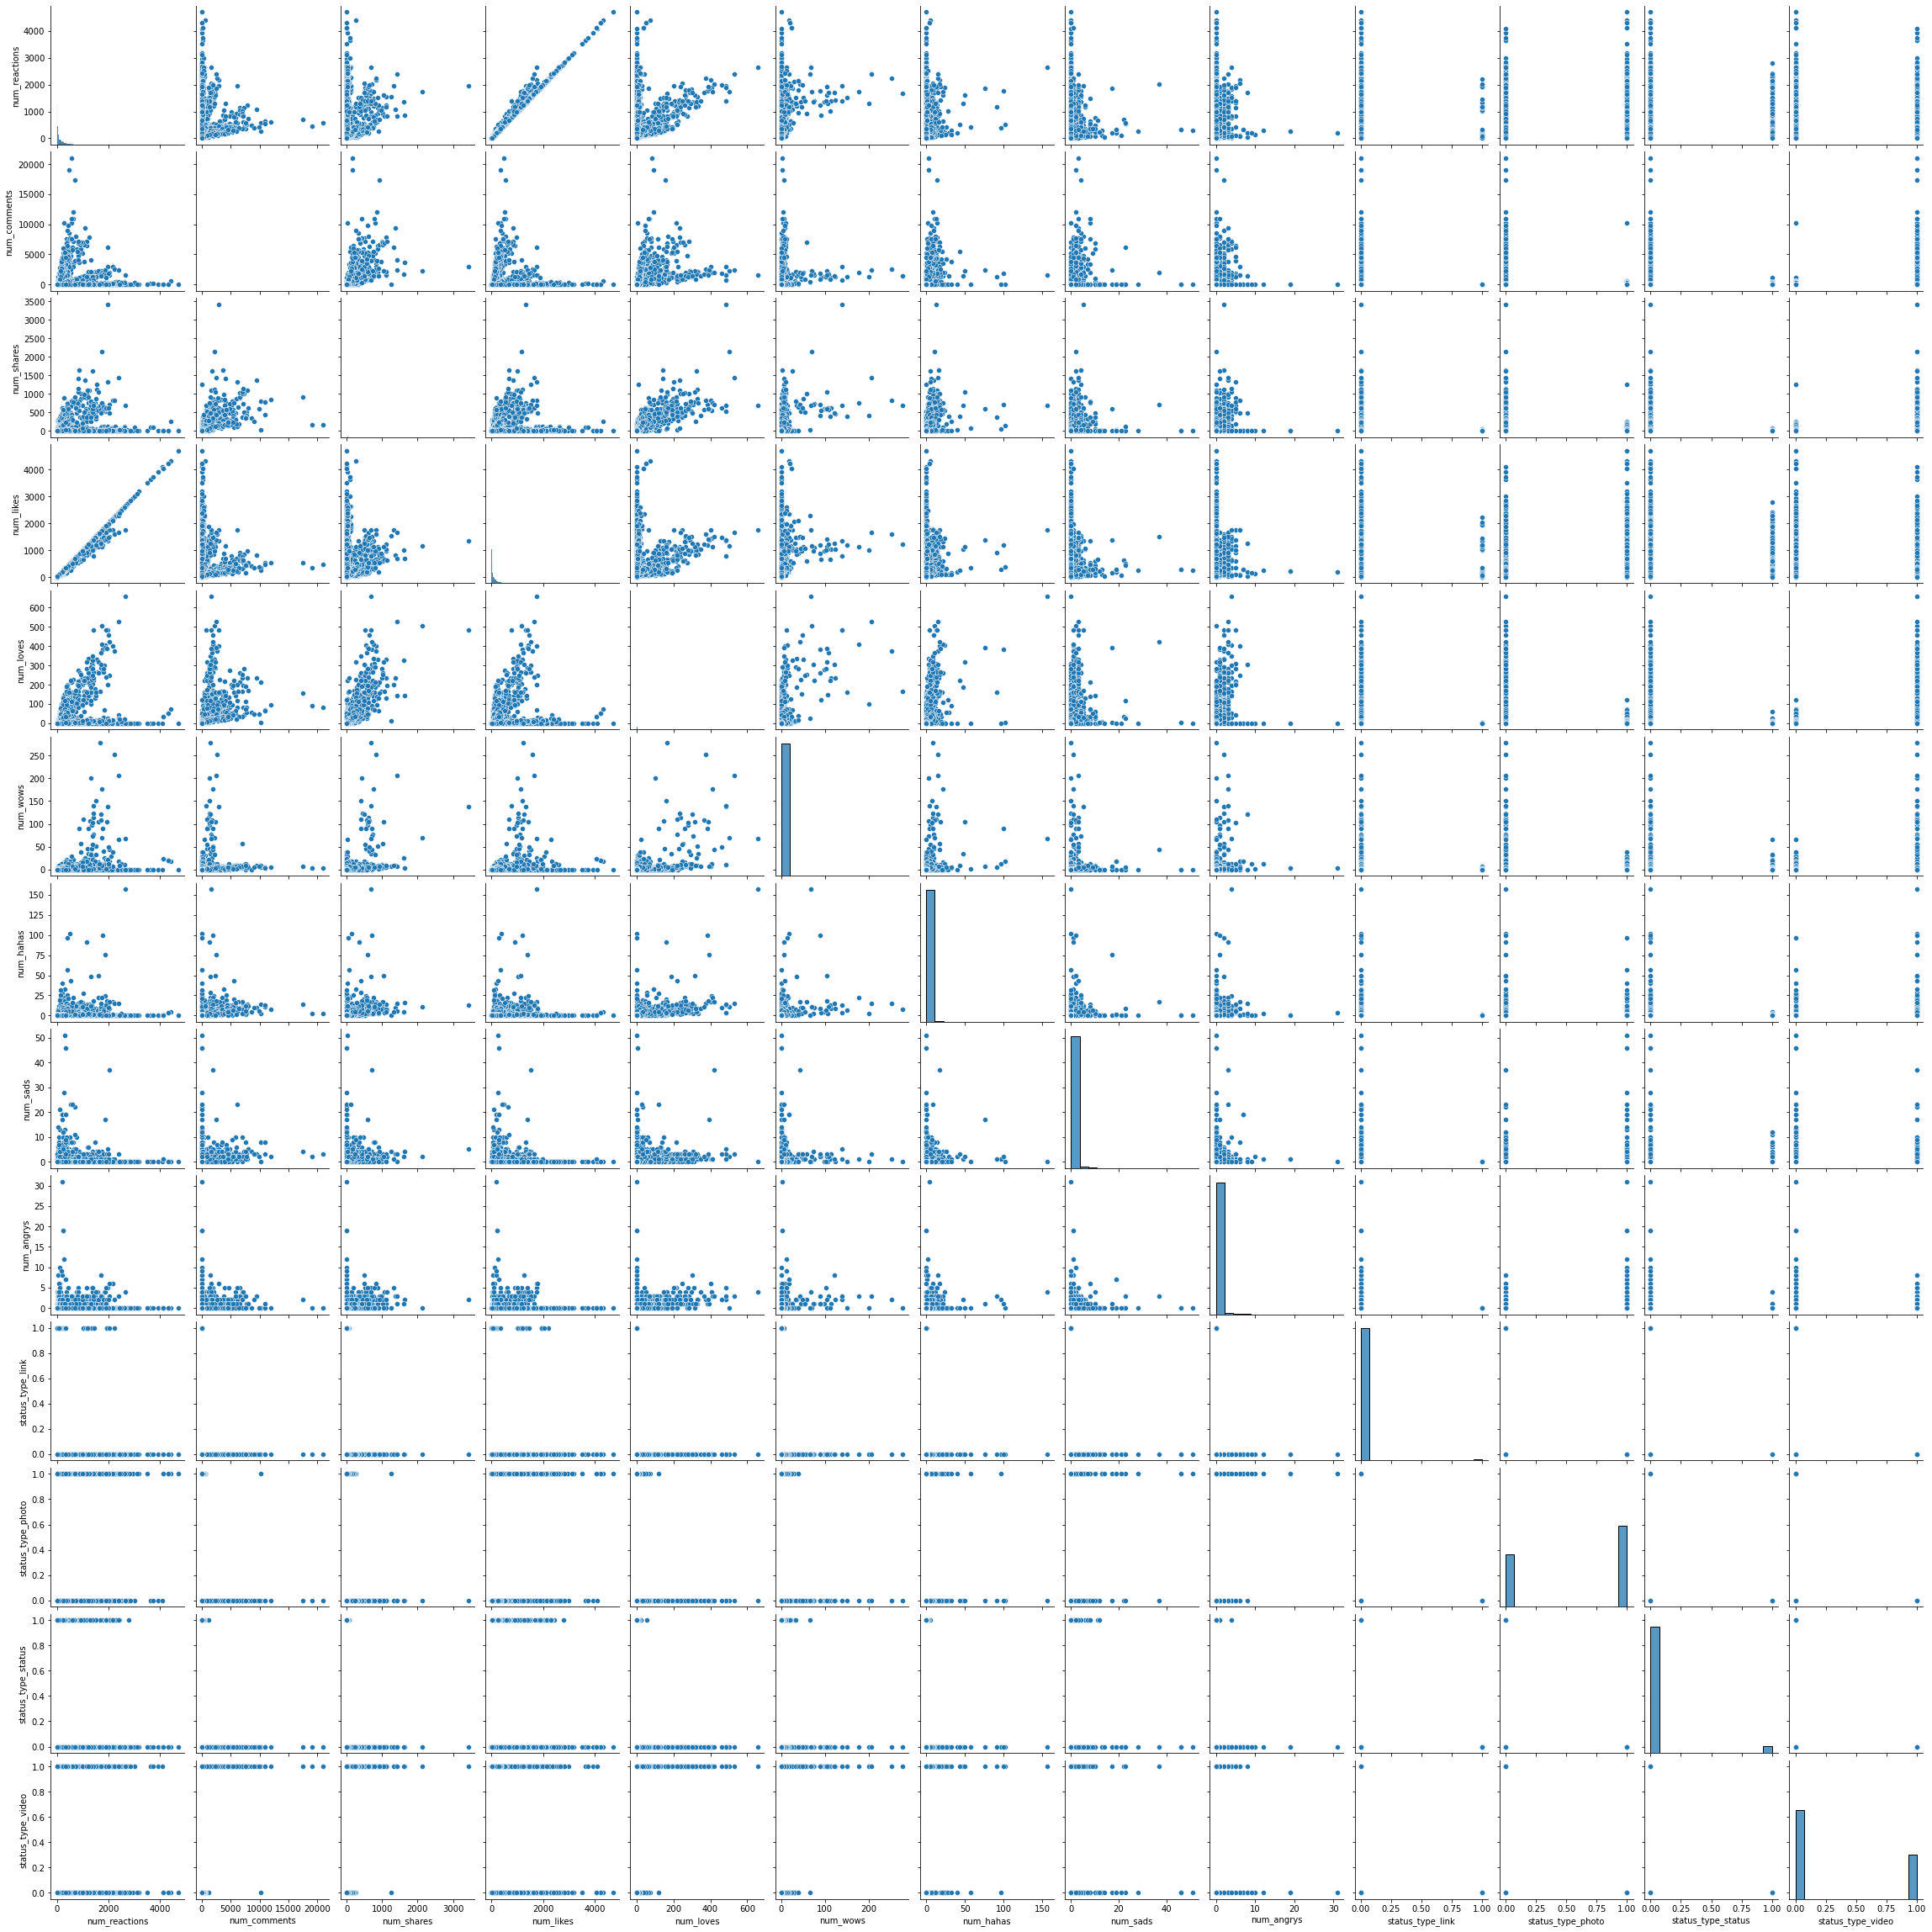

In [12]:
sns.pairplot(data)

In [13]:
# Scaling data

scaled_data = StandardScaler().fit_transform(data)

In [14]:
# Finding the optimal number of k
wcss = []

for i in range(2,20):
    kmodel = KMeans(n_clusters = i, init = 'random') #init - initial cluster centers are random
    kmodel.fit(scaled_data)
    wcss.append(kmodel.inertia_)

In [15]:
wcss

[75294.89352762971,
 62556.47097189924,
 52990.183030301574,
 45763.89493397421,
 38734.129567132826,
 33322.32560688698,
 29501.523042709094,
 26293.04459837736,
 23272.787375726846,
 22417.162819409845,
 20218.00588319236,
 19303.86627496677,
 17286.452680918588,
 16456.54435948829,
 16053.594778516366,
 15629.024601654088,
 15080.139855142894,
 14164.206454114918]

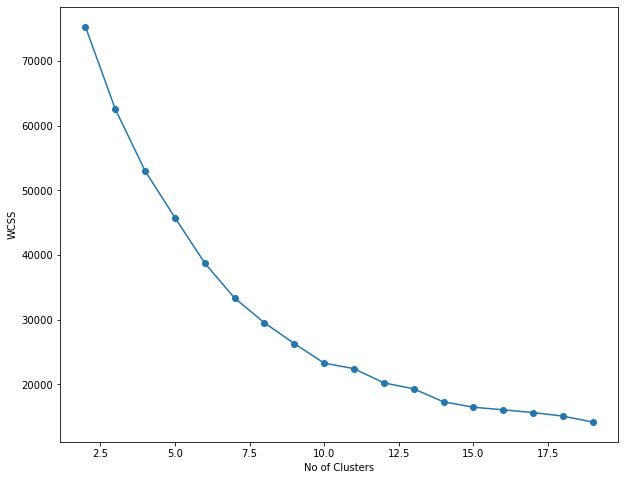

In [16]:
# Elbow plot
plt.figure(figsize = (10,8))
plt.plot(range(2,20), wcss, marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Creating final model with 10 clusters
kmod_final = KMeans(n_clusters = 10, init = 'random').fit(scaled_data)
cluster = kmod_final.predict(scaled_data)

In [18]:
kmod_final.inertia_

23274.75090488362

In [19]:
cluster

array([5, 2, 5, ..., 2, 2, 2])

In [20]:
data2 = pd.read_csv('C:/Users/Dell/Downloads/Live_20210128.csv')
data2['Cluster']=cluster
data2.iloc[:,[0,16]].head(10)

,status_id,Cluster
0,1,5
1,2,2
2,3,5
3,4,2
4,5,2
5,6,2
6,7,5
7,8,5
8,9,2
9,10,2


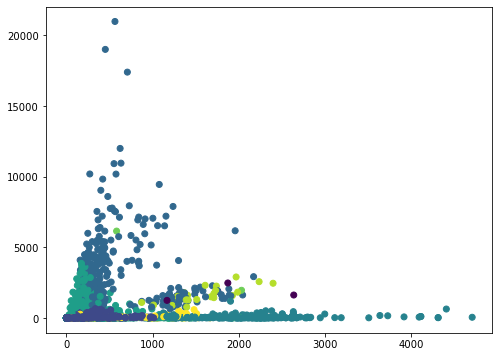

In [24]:
plt.figure(figsize= (8,6))
plt.scatter(data['num_reactions'], data['num_comments'], c = cluster)
plt.show()

# KNN - Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('C:/Users/Dell/Downloads/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [133]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [159]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

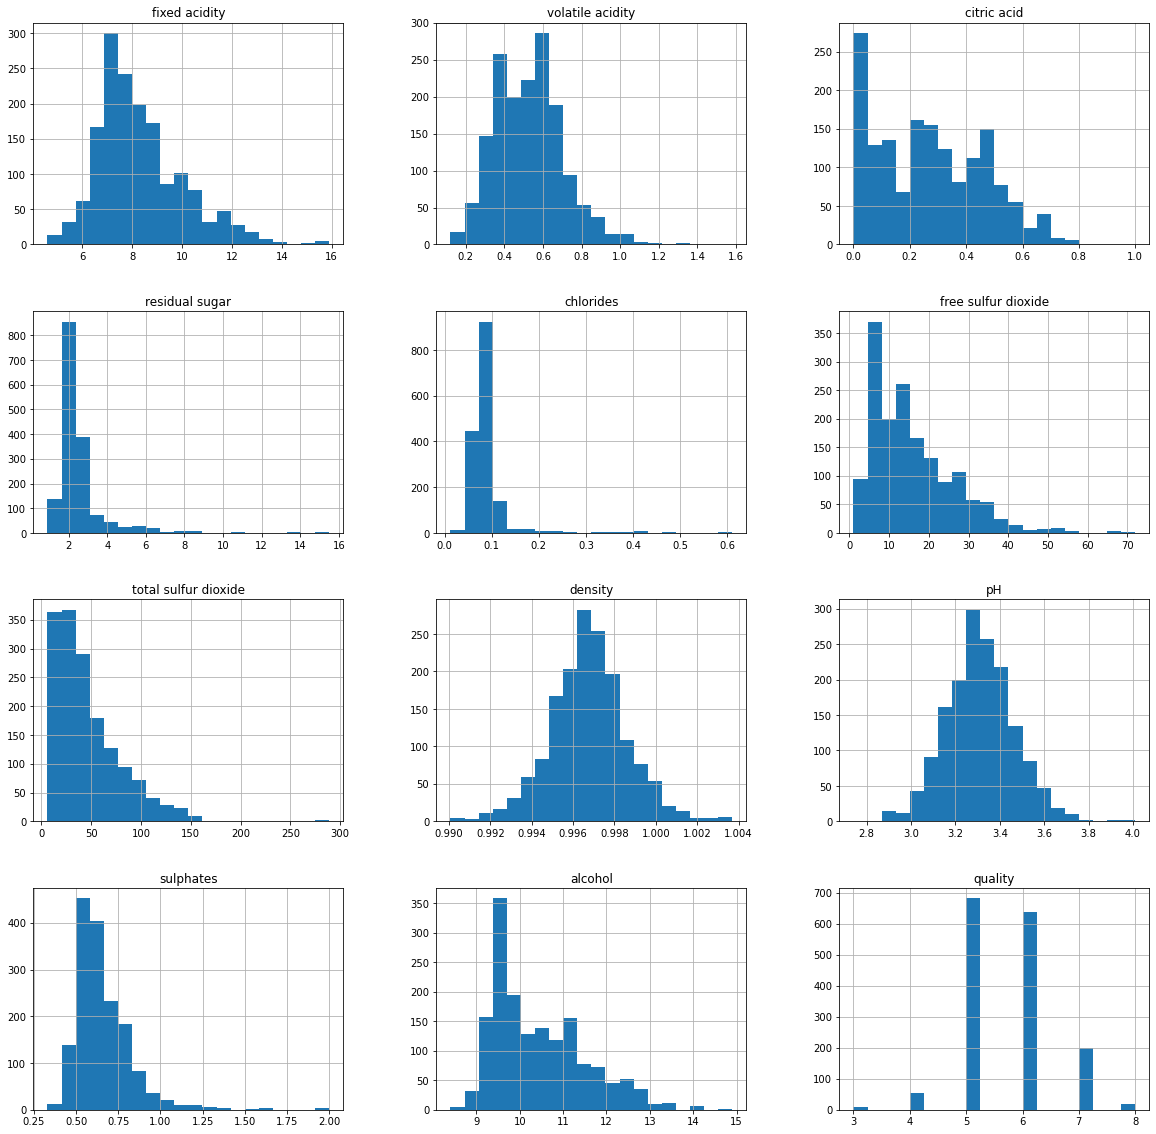

In [134]:
data.hist(bins = 20, figsize = (20,20))
plt.show

<AxesSubplot:>

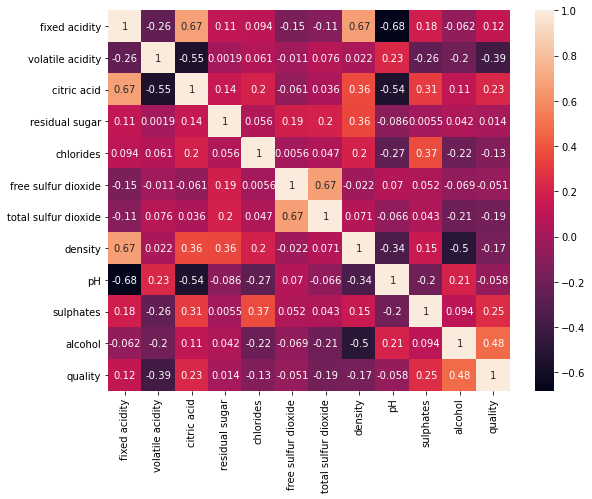

In [138]:
plt.figure(figsize = (9,7))
sns.heatmap(data.corr(), annot = True)

In [139]:
# Splitting the data
x = data.drop('quality', axis = 1)
y = data['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [143]:
# Scaling data
scaled_x = StandardScaler().fit_transform(x)

In [187]:
x_tr, x_test, y_tr, y_test = train_test_split(scaled_x, y, test_size = 0.3)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [193]:
# Find the optimal number of k
params = {'n_neighbors': range(1,20)}

gscv_mod = GridSearchCV(KNeighborsClassifier(), params , cv = 8)

In [194]:
# Fitting
gscv_mod.fit(x_tr, y_tr)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [195]:
# best value of k
gscv_mod.best_params_

{'n_neighbors': 6}

In [196]:
# Applying knn
knn_model = KNeighborsClassifier(n_neighbors = 6).fit(x_tr, y_tr)

pred_knn = knn_model.predict(x_test)

In [197]:
# Classification report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.63      0.68      0.66       207
           6       0.53      0.54      0.53       192
           7       0.39      0.36      0.38        61
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.53      0.55      0.54       480



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
